# Eigenfaces for Recognition

**This was an assignment submitted for the course _Stat. and Math. Methods in Data Science_(Fall 2020) @ FAST-NU, Lahore. It requires an implementation from scratch of the paper, Eigenfaces for Recognition (1991) by Matthew Turk and Alex Pentland.**

Ofcourse, Computer Vision techniques have come a long way since in recognizing faces. Classification problems have also become more challenging and sophisticated. But, at the time, this implementation aimed to teach the topic of Principal Component Analysis (PCA) and its applications.

* *Turk, M., & Pentland, A. (1991). Eigenfaces for recognition. Journal of cognitive neuroscience, 3(1), 71-86. https://doi.org/10.1162/jocn.1991.3.1.71*

## Table of Contents:
1. [An Introduction to the Principal Component Analysis](#intro2pca)<br/>
&ensp;1-1. [Eigenvalues & Eigenvectors](#eigenstuff)<br/>
&ensp;1-2. [Maximizing Variance](#Variance)<br/>
&ensp;1-3. [Covariance Matrices](#covmatrix)<br/>
2. [The Paper](#paper)<br/>
3. [The Implementation](#implementation)<br/>
&ensp;3-1. [The Dataset](#dataset)<br/>
&ensp;3-2. [Calculating the covariance matrices](#impcovmat)<br/>
&ensp;3-3. [Finding the Eigenvalues and the Eigenvectors of the Covariance Matrix](#impeig)<br/>
&ensp;3-4. [Selecting Principal Components](#impprinccomp)<br/>
&ensp;3-5. [Training Error](#trainingerror)<br/>
&ensp;3-6. [Testing Error](#testingerror)<br/>
4. [Conclusion](#Conclusion)<br/>

### <a name="intro2pca">1. An Introduction to the Principal Component Analysis</a>
Principal Component Analysis (PCA) is a linear transformation technique that projects higher order dimensional data onto lower order form [[1]](#carnegie-melon). It is highly effective yet simple for dimensionality reduction that tries to minimize information loss. The primary objective of this method in mathematical terms is to calculate a basis which is a linear combination of the original basis [[2]](#princeton_source). We're calculating these basis vectors under the condition that we can maximize the variance. The direction along which our data has the largest variance will become the first principal component. Each successive principal component _n_ is orthogonal to the previous _n-1_ principal components. Finally, the benefits of PCA are that it extracts important information from the data table, compresses the data set size, simplifies its description and analyzes the structure of its variables and observations. [[3]](#utdallas_source)

#### <a name="eigenstuff">1-1. Eigenvalues & Eigenvectors</a>
We define a scalar value &lambda; as an eigenvalue of a square matrix A, if a non-zero column vector <strong>x</strong> exists, such that 

<p style="text-align: center;">A<strong>x</strong> = &lambda;<strong>x</strong> </p>
Eigenvectors are defined by the nonzero column vectors <strong>x</strong> that satisfy the equation above. That is to say, <strong>0</strong> vector is never an eigenvector.

To find eigenvalues and eigenvectors, we first define a characteristic equation:

<p style="text-align: center;">det |A-&lambda;I| = 0</p>

The determinant of an identity matrix (multiplied by the eigenvalue) subtracted from A is 0. A significant observation in this equation is that it does not need the <strong>x</strong> vector to find the eigenvalues. Solving the equation above results in estimating the correct eigenvalues.

#### <a name="Variance">1-2. Maximizing Variance</a>
Linear Systems exhibit noise and redundancies  in garbled data. High precision data has higher Signal-to-noise ratio. Redundancies determine the correlation values among features. Highly correlated feature sets depict redundancies, therefore, atleast one needs to be dropped. 
We measure redundancies using covariance matrices.

#### <a name="covmatrix">1-3. Covariance Matrices</a> [[2]](#princeton_source)
<p>Where the variance of a set of zero-meaned random measurements <strong>A</strong> = {a<sub>1</sub>,a<sub>2</sub>,...,a<sub>n</sub>} is defined by &sigma;<sup>2</sup><sub>A</sub> = {a<sub>i</sub>,a<sub>i</sub>}<sub>i</sub>, we similarly define covariances of two variables A & B as &sigma;<sup>2</sup><sub>AB</sub> = {a<sub>i</sub>,b<sub>i</sub>}<sub>i</sub></p>

Some fun facts about covariances:

1. Two variables are uncorrelated if the covariance of these two is 0.
2. Two variables have correlation if the covariance equals the variance of any one of them.

Each value in a covariance matrix is a covariance of two adjoining variables.

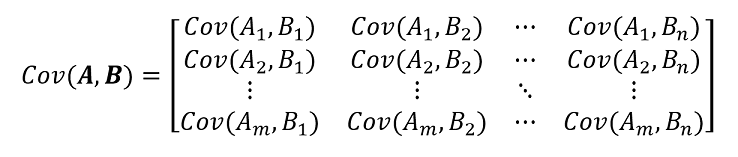

Also, the following formula is a quicker calculation of the covariance matrix.

<p style="text-align: center;">Cov<sub>X</sub> &equiv; (<sup>1</sup>&frasl;<sub>n-1</sub>)<strong>XX<sup>T</sup></strong></p>

### <a name="paper">2. The Paper</a> [[4]](#thepaperlink)
Turk and Pentland (1991) developed a facial recognition method to efficiently compare facial features among a large dataset of face photographs. This breakthrough exhibited speed improvements and a boost in accuracies. The proposed method incorporates the problem of lighting variations, mood, glasses, and an extended set of further contrasting disparities that might lower accuracies. The paper mentions the proposed method as a significant factor when applied to criminal identification, image/video processing, human-computer interaction, color correction, noise reduction. </br>
&ensp; An information theorist would describe the approach as efficiently encoding the relevant information from a face image and efficiently comparing the encoded information to encoded information of other facial features. </br>
&ensp; The main idea is to leverage principal components of the distribution of faces taking an image as high dimensional data. Eigenvectors represent the variation in face images.

Initially, the dataset needs to be prepared by acquiring a training set, calculating the eigenfaces (images with the highest eigenvalues), and finally, calculating the corresponding distribution for each known individual and project their face images onto the face space.

In summary, the process is as follows

1. Collect multiple images per person, each varying another.
2. Calculate a matrix the size of the number of people in the dataset.
3. Choose a set of highest eigenvalues (say the no. of people in the dataset)
4. We combine the normalized training set of images to produce eigenfaces (the no. of which are determined in point 3.).
5. A class vector is calculated for each person by averaging eigenface pattern vectors and a threshold value is set that defines the maximum allowed distance from face space.
6. For all new face images, a pattern vector is calculated and the distances to each known class. The distances are compared to the threshold value to determine if the image of the person exists in the dataset.
7. For known persons the image is added to the training data and the eigenfaces are recalculated to better identification of recurring individuals.

### <a name="implementation">3. The Implementation</a>
I have implementated this paper using NumPy to speed up the process. Although, the assignment has asked for implementation from scratch, an implementation in sci-Kit Learn is provided to compare the results.

#### <a name="dataset">3-1. The Dataset</a>
I will be using the 5 celebrity faces dataset [[5]](#thydataset). I did use a set of images of my classmates that we had pooled together at the time but for privacy reasons, I am going to demonstrate my abilities on the 5 -celebrity faces dataset. The dataset is pre-split into training and testing pictures and, based on varying conditions such as lighting, glasses, mood etc. 

In [1]:
# Importing necessary modules
import numpy as np
import pandas as pd
import os
#import cv2
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
help(fetch_olivetti_faces)

Help on function fetch_olivetti_faces in module sklearn.datasets._olivetti_faces:

fetch_olivetti_faces(*, data_home=None, shuffle=False, random_state=0, download_if_missing=True, return_X_y=False)
    Load the Olivetti faces data-set from AT&T (classification).
    
    Download it if necessary.
    
    =================   =====================
    Classes                                40
    Samples total                         400
    Dimensionality                       4096
    Features            real, between 0 and 1
    =================   =====================
    
    Read more in the :ref:`User Guide <olivetti_faces_dataset>`.
    
    Parameters
    ----------
    data_home : str, default=None
        Specify another download and cache folder for the datasets. By default
        all scikit-learn data is stored in '~/scikit_learn_data' subfolders.
    
    shuffle : bool, default=False
        If True the order of the dataset is shuffled to avoid having
        images of 

In [3]:
olivetti_faces = fetch_olivetti_faces(shuffle = True)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


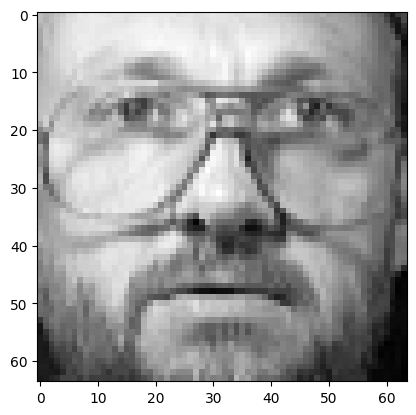

In [4]:
plt.imshow(olivetti_faces['images'][0], cmap = 'gray')

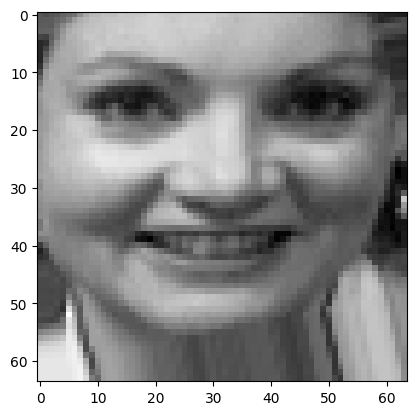

In [5]:
plt.imshow(olivetti_faces['images'][2], cmap = 'gray')

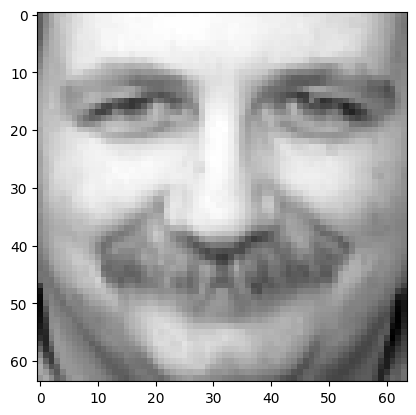

In [6]:
plt.imshow(olivetti_faces['images'][4], cmap = 'gray')

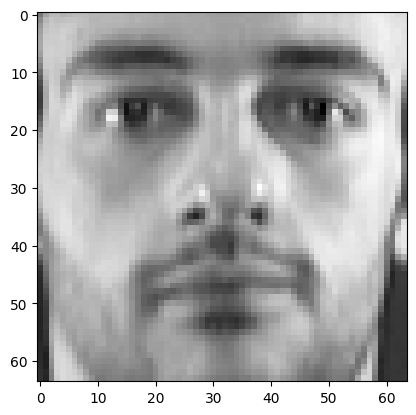

In [7]:
plt.imshow(olivetti_faces['images'][6], cmap = 'gray')

In [8]:
olivetti_faces['target']

array([13, 30, 34, 19, 24,  6, 15, 26, 14, 21,  3, 13, 11, 34,  1,  5, 29,
       14, 20, 19, 17, 26, 12, 34, 17, 31,  7,  1, 28, 10, 17, 30, 33, 22,
        6,  7,  9, 17, 17, 39, 10, 32,  0,  0, 29,  5, 37, 25, 15, 23, 24,
       14, 29, 17, 28, 31,  5,  1,  2,  4,  7, 27,  0, 35, 19, 37, 14,  0,
       15, 31,  0, 26,  6,  2, 10,  1, 36, 30, 36, 32, 33,  6,  5, 10, 30,
       22, 12, 37, 39, 32, 38, 25,  5,  0, 19, 14, 13, 39, 26, 36, 25,  6,
       31, 15, 28, 34,  8, 34, 15, 29,  9,  8, 29,  2, 36, 21, 25,  4, 23,
       34,  9, 22, 23, 23, 37, 14,  2, 25, 35, 16, 15, 39,  6, 24, 21, 10,
       31, 19, 32,  1, 16, 18,  3, 11, 26, 10, 35, 24, 23, 11, 33, 12, 28,
       11, 21, 13, 27, 12, 19, 29, 28, 13,  3, 37, 16,  3, 23,  9,  8,  6,
       16, 28, 20, 39, 23, 28, 10,  4, 32, 39, 22,  7, 13, 38, 22, 21,  2,
       18, 36, 27,  5, 32, 35,  2,  0, 21, 15, 21, 37, 22, 13, 23, 21, 27,
       27, 30, 23,  3, 20, 39,  6,  2, 33,  4, 24, 12,  9, 11, 16, 38, 38,
       34,  4,  1, 28,  7

In [9]:
olivetti_faces['data'].shape

(400, 4096)

In [10]:
type(olivetti_faces['data'])

numpy.ndarray

In [11]:
olivetti_faces['images'][0]

array([[0.6694215 , 0.6363636 , 0.6487603 , ..., 0.14049587, 0.2603306 ,
        0.30165288],
       [0.661157  , 0.62396693, 0.6652893 , ..., 0.17355372, 0.1570248 ,
        0.29752067],
       [0.6280992 , 0.6570248 , 0.6446281 , ..., 0.22727273, 0.12809917,
        0.22727273],
       ...,
       [0.16115703, 0.16115703, 0.13636364, ..., 0.08677686, 0.09504132,
        0.07438017],
       [0.1570248 , 0.1570248 , 0.15289256, ..., 0.08677686, 0.08677686,
        0.0661157 ],
       [0.14049587, 0.15289256, 0.18181819, ..., 0.08677686, 0.08264463,
        0.07438017]], dtype=float32)

In [12]:
# We now perform a train test split of 3:1
# As we have already shuffled the data
train_data = olivetti_faces['images'][:300]
train_labels = olivetti_faces['target'][:300]
test_data = olivetti_faces['images'][300:]
test_labels = olivetti_faces['target'][300:]

In [13]:
test_labels.shape

(100,)

### We find the mean image

Text(0.5, 1.0, 'The Mean Image of the Training Data')

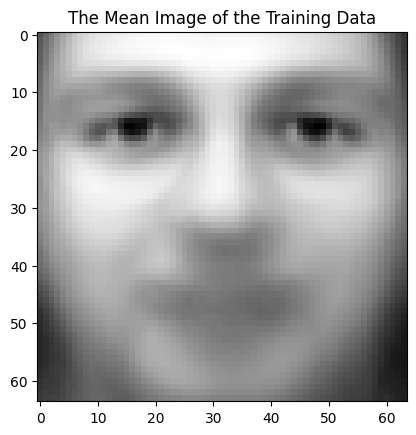

In [14]:
# First we find the mean of all the training images
# Each image is 64 x 64 = 4096
mean_image = np.zeros((64,64))
for i in range(train_data.shape[0]):
    mean_image += train_data[i]
mean_image /= train_data.shape[0]
plt.imshow(mean_image, cmap = 'gray')
plt.title("The Mean Image of the Training Data")

In [15]:
# Now we subtract it from each image in the training data
for i in range(train_data.shape[0]):
    train_data[i] -= mean_image

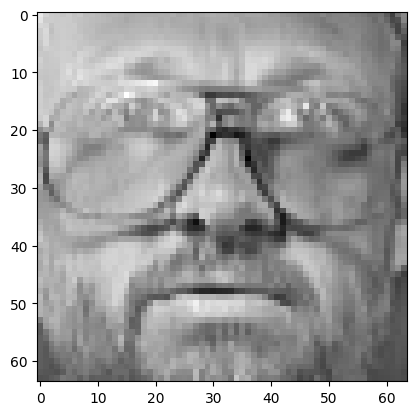

In [16]:
plt.imshow(train_data[0], cmap = "gray")

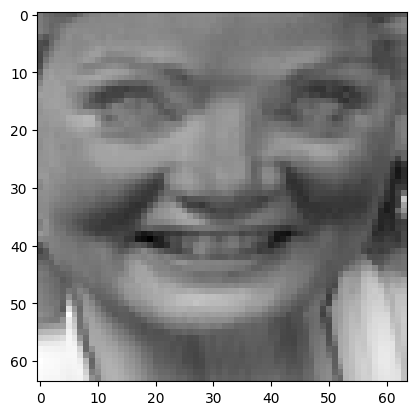

In [17]:
plt.imshow(train_data[2], cmap = "gray")

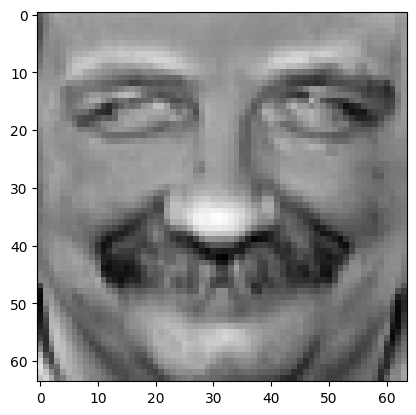

In [18]:
plt.imshow(train_data[4], cmap = "gray")

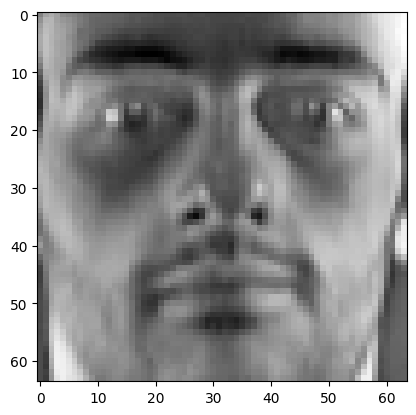

In [19]:
plt.imshow(train_data[6], cmap = "gray")

### *Haunting*

#### <a name="impcovmat">3-2. Calculating the Covariance Matrix</a>

In [20]:
# We use the formula 1/m (XTX)
# m = 300 (train_data.shape)
# X is the training data
# But first we have to vectorize each image
train_data_flat = np.zeros((train_data.shape[0], 4096))
for i in range(train_data.shape[0]):
    train_data_flat[i] = train_data[i].flatten()

Cov_Mat = (1/float(train_data.shape[0])) * np.matmul(train_data_flat,train_data_flat.T)

#### <a name="imeig">3-3. Finding the Eigenvalues and Eigenvectors of the Covariance Matrix</a>

In [21]:
# Now we find eigenvalues and eigenvectors 
# Looks like we're to have 300 eigenvalues
w, v = np.linalg.eig(Cov_Mat)

In [22]:
print(w.shape); print(v.shape)

(300,)
(300, 300)


In [23]:
# Sorting the eigenvalues
eig_sorted_ind = np.argsort(w)[::-1]
sorted_eigenvectors = v[:,eig_sorted_ind]
sorted_eigenvectors

array([[ 0.01248861,  0.0687027 , -0.06220773, ..., -0.00673047,
        -0.01492508,  0.05773502],
       [ 0.05001323,  0.0223723 ,  0.12315867, ...,  0.00285182,
         0.0036403 ,  0.05773504],
       [ 0.06392794,  0.00792281,  0.01733306, ..., -0.00412868,
        -0.00806851,  0.05773501],
       ...,
       [ 0.03137513, -0.04421499, -0.02240815, ...,  0.00360624,
        -0.03422222,  0.05773502],
       [-0.00655081, -0.01268538, -0.02647333, ..., -0.08968526,
        -0.05873652,  0.05773502],
       [-0.0856251 ,  0.00762939,  0.03008859, ..., -0.04052542,
        -0.01601559,  0.05773502]])

#### <a name="expvar">3-4. Finding the Explained Variance</a>

In [24]:
def explained_variance_(eigenvalues):
    total = sum(eigenvalues)
    exp_variance = [eigs/total for eigs in eigenvalues]
    return exp_variance

exp_variance = explained_variance_(np.sort(w)[::-1])

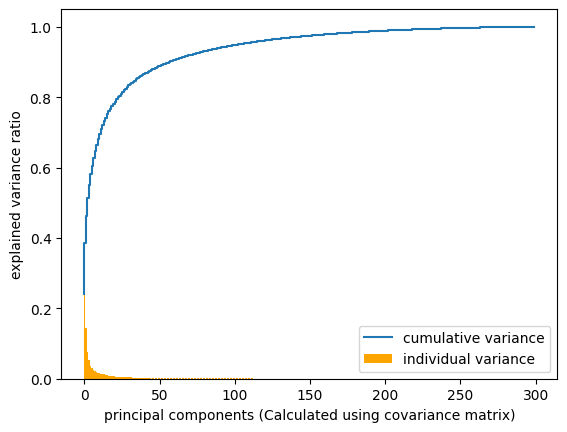

In [25]:
import matplotlib.pyplot as plt
def plot_variance(exp_variance):    
    cum_exp_variance = np.cumsum(exp_variance)
    plt.bar(range(len(exp_variance)), exp_variance, label = "individual variance", color= 'orange')
    plt.step(range(len(cum_exp_variance)), cum_exp_variance, label = "cumulative variance")
    plt.ylabel("explained variance ratio")
    plt.xlabel("principal components (Calculated using covariance matrix)")
    plt.legend()
    plt.show()
plot_variance(exp_variance)
#print("Explained variance ratio:",exp_variance)

#### <a name="impprinccomp">3-5. Selecting Principal Components</a>

In [26]:
# This K < M is a global variable that determines how PCA responds to downsizing
# K should be less than size of sorted eigenvectors

K = 80
assert(K < sorted_eigenvectors.shape[0])
sorted_eigenvectors = sorted_eigenvectors[:,:K]

#### <a name="eigspace">3-6. The Eigenspace (The Final Data)</a>

In [27]:
# We now show that each training image is a dot product of top K eigenvectors
# with the mean subtracted training images
#final_data = np.matmul(train_data.reshape(300,-1).T, sorted_eigenvectors)
# final_data also called the eigenspace
# sorted_eigenvectors also called the weight vectors
final_data = np.matmul(sorted_eigenvectors.T, train_data.reshape(300,-1))
final_data.shape

(80, 4096)

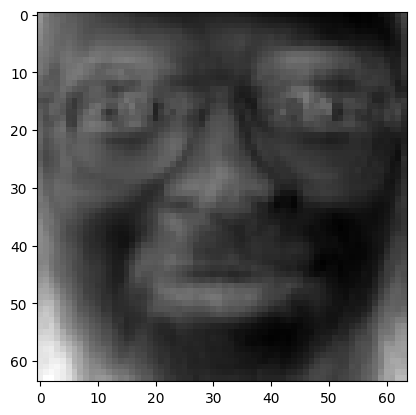

In [28]:
#plt.imshow(final_data[0,:].reshape(64,64),cmap='gray')
plt.imshow(final_data[0,:].reshape(64,64),cmap='gray')

In [29]:
# Obtaining the original data
original_data = np.matmul(sorted_eigenvectors, final_data).reshape(300, 64, 64) + mean_image
original_data.shape

(300, 64, 64)

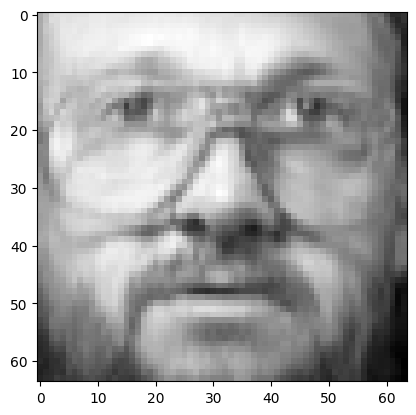

In [30]:
plt.imshow(original_data[0,:],cmap='gray')

In [31]:
# the original labels
train_labels

array([13, 30, 34, 19, 24,  6, 15, 26, 14, 21,  3, 13, 11, 34,  1,  5, 29,
       14, 20, 19, 17, 26, 12, 34, 17, 31,  7,  1, 28, 10, 17, 30, 33, 22,
        6,  7,  9, 17, 17, 39, 10, 32,  0,  0, 29,  5, 37, 25, 15, 23, 24,
       14, 29, 17, 28, 31,  5,  1,  2,  4,  7, 27,  0, 35, 19, 37, 14,  0,
       15, 31,  0, 26,  6,  2, 10,  1, 36, 30, 36, 32, 33,  6,  5, 10, 30,
       22, 12, 37, 39, 32, 38, 25,  5,  0, 19, 14, 13, 39, 26, 36, 25,  6,
       31, 15, 28, 34,  8, 34, 15, 29,  9,  8, 29,  2, 36, 21, 25,  4, 23,
       34,  9, 22, 23, 23, 37, 14,  2, 25, 35, 16, 15, 39,  6, 24, 21, 10,
       31, 19, 32,  1, 16, 18,  3, 11, 26, 10, 35, 24, 23, 11, 33, 12, 28,
       11, 21, 13, 27, 12, 19, 29, 28, 13,  3, 37, 16,  3, 23,  9,  8,  6,
       16, 28, 20, 39, 23, 28, 10,  4, 32, 39, 22,  7, 13, 38, 22, 21,  2,
       18, 36, 27,  5, 32, 35,  2,  0, 21, 15, 21, 37, 22, 13, 23, 21, 27,
       27, 30, 23,  3, 20, 39,  6,  2, 33,  4, 24, 12,  9, 11, 16, 38, 38,
       34,  4,  1, 28,  7

In [32]:
distance_matrix = np.inf * np.ones((original_data.shape[0], train_data.shape[0]),dtype = float)
for i in range(original_data.shape[0]):
    for j in range(train_data.shape[0]):
        # calculating the euclidean distance
        distance_matrix[i,j] = np.linalg.norm(original_data[i] - (train_data[j] + mean_image))

In [33]:
original_data[i].shape

(64, 64)

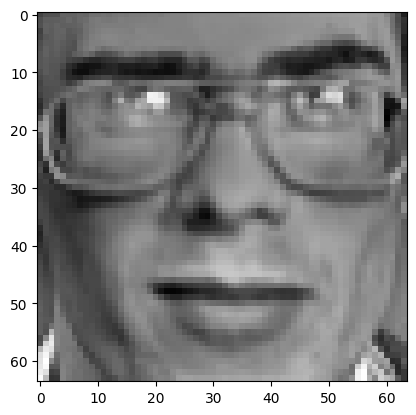

In [34]:
plt.imshow(train_data[3], cmap = 'gray')

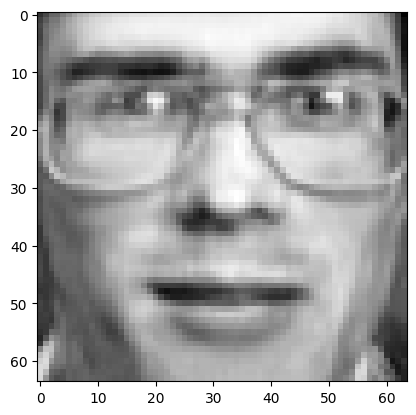

In [35]:
plt.imshow(original_data[3], cmap = 'gray')

In [36]:
distance_matrix

array([[ 2.43959346, 12.79499581, 13.07285664, ..., 11.84238316,
         9.43104293, 12.24600428],
       [12.73510332,  2.73508272, 12.08538412, ..., 12.08767793,
        11.09545005, 15.17722242],
       [13.0520179 , 12.12605299,  2.54873023, ..., 11.60832507,
        10.70704704, 16.21321012],
       ...,
       [11.95738029, 12.26286767, 11.74880951, ...,  1.7929617 ,
         8.65443151, 14.04891934],
       [ 9.55795963, 11.27156132, 10.84413609, ...,  8.63552556,
         1.88191249, 10.69011253],
       [12.27745596, 15.25281763, 16.25373484, ..., 13.97878872,
        10.61318936,  2.27602991]])

#### <a name="trainingerror">3-7. Training Error</a>

In [37]:
closest_image = np.argmin(distance_matrix, axis = 0)
predicted_labels = train_labels[closest_image]

In [38]:
training_error = np.zeros(predicted_labels.shape)
training_error = np.where(predicted_labels - train_labels == 0, 0, 1)
training_error_sum = np.sum(training_error) / predicted_labels.size
training_error_sum

0.0

In [39]:
closest_image

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

#### <a name="testingerror">3-8. Testing Error</a>

In [40]:
test_data -= mean_image

In [41]:
# right now i am checking only one image
related_index = np.ones(test_data.shape[0], dtype = int)
for i in range(test_data.shape[0]):
    projection = np.matmul(final_data, test_data[i].reshape(-1,1))
    difference = sorted_eigenvectors - projection.flatten()
    euclidean_distance = np.linalg.norm(difference, axis = 1)
    related_index[i] = np.argmin(euclidean_distance)

In [42]:
test_errors = np.sum(np.where(train_labels[related_index] == test_labels, 0, 1))/test_labels.size
print(test_errors * 100,"%", sep = '')

34.0%


#### <a name="conclusion">4. Conclusion</a>

Convergence happens after 80 principal components. About one-fourth of the training data. The testing error is 34%, increasing principal component count to 100 gives us 34% too. That is as low as it gets. This notebook does not account for face image data problems such as viewpoint, occlusion, lighting variation and appearance variation. 

# Sources
<a name="carnegie_melon" href="https://www.stat.cmu.edu/~cshalizi/uADA/12/lectures/ch18.pdf">[1] https://www.stat.cmu.edu/~cshalizi/uADA/12/lectures/ch18.pdf</a> </br>

<a name="princeton_source" href="https://www.cs.princeton.edu/picasso/mats/PCA-Tutorial-Intuition_jp.pdf">[2] https://www.cs.princeton.edu/picasso/mats/PCA-Tutorial-Intuition_jp.pdf</a> </br>

<a name="utdallas_source" href="https://www.utdallas.edu/~herve/abdi-awPCA2010.pdf">[3] https://www.utdallas.edu/~herve/abdi-awPCA2010.pdf</a> </br>

<a name="thepaperlink"> [4] Turk, M., & Pentland, A. (1991). Eigenfaces for recognition. Journal of cognitive neuroscience, 3(1), 71-86.</a> <a href="https://doi.org/10.1162/jocn.1991.3.1.71">https://doi.org/10.1162/jocn.1991.3.1.71</a>

<a name="thydataset" href="https://www.kaggle.com/datasets/dansbecker/5-celebrity-faces-dataset"> [5] https://www.kaggle.com/datasets/dansbecker/5-celebrity-faces-dataset</a>